In [13]:
import os
import glob
from matplotlib import pyplot as plt
import re
import numpy as np

In [14]:
path = r'C:\Users\parkf\Desktop\summer2021\htcRunsTraceLam'

subjectList = []
ridgeVec = []
memVec = []
foldVec = []

for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    if int(fileNum) not in subjectList:
        subjectList.append(int(fileNum))
    if int(memNum) not in memVec:
        memVec.append(int(memNum))
    if float(ridgeNum) not in ridgeVec:
        ridgeVec.append(float(ridgeNum))
    if int(foldNum) not in foldVec:
        foldVec.append(int(foldNum))

err = np.zeros((len(subjectList), len(memVec), len(ridgeVec), len(foldVec)))
for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    f = open(filename,"r")
    error = (float(f.read()))
    err[subjectList.index(int(fileNum)), memVec.index(int(memNum)), ridgeVec.index(float(ridgeNum)), int(foldNum)] = error
      
            
errNoCv = np.mean(err,3)
    

In [15]:
print(subjectList)
print(memVec)
print(ridgeVec)

[282, 335, 439, 524]
[12, 16, 20, 24, 28, 4, 8]
[0.0001, 0.001]


In [16]:
print(errNoCv.shape)
print(err.shape)
print(err)
print(errNoCv)

(4, 7, 2)
(4, 7, 2, 10)
[[[[0.00902889 0.00902889 0.00902889 0.00902889 0.00902889 0.00902889
    0.00902889 0.00902889 0.00902889 0.00902889]
   [0.01344262 0.01344262 0.01344262 0.01344262 0.01344262 0.01344262
    0.01344262 0.01344262 0.01344262 0.01344262]]

  [[0.00936057 0.00936057 0.00936057 0.00936057 0.00936057 0.00936057
    0.00936057 0.00936057 0.00936057 0.00936057]
   [0.0142915  0.0142915  0.0142915  0.0142915  0.0142915  0.0142915
    0.0142915  0.0142915  0.0142915  0.0142915 ]]

  [[0.00965875 0.00965875 0.00965875 0.00965875 0.00965875 0.00965875
    0.00965875 0.00965875 0.00965875 0.00965875]
   [0.01501905 0.01501905 0.01501905 0.01501905 0.01501905 0.01501905
    0.01501905 0.01501905 0.01501905 0.01501905]]

  [[0.00992403 0.00992403 0.00992403 0.00992403 0.00992403 0.00992403
    0.00992403 0.00992403 0.00992403 0.00992403]
   [0.01564221 0.01564221 0.01564221 0.01564221 0.01564221 0.01564221
    0.01564221 0.01564221 0.01564221 0.01564221]]

  [[0.01016757 0.

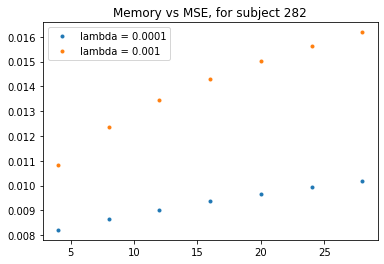

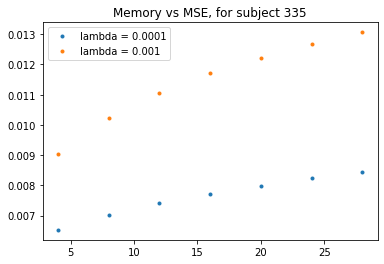

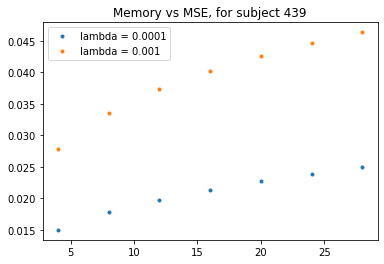

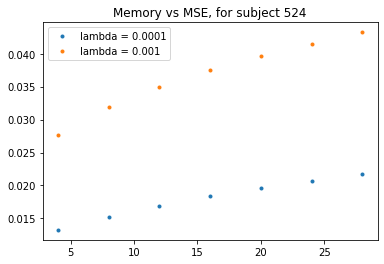

In [17]:
for n in range(len(subjectList)):
    titleString = f"Memory vs MSE, for subject {subjectList[n]}"
    plt.title(titleString)
    for i in range(len(ridgeVec)):
        plt.plot(memVec[:], errNoCv[n , :, i], ".", label = f"lambda = {ridgeVec[i]}") ## figure out columns to pass
    plt.legend()
    plt.show()